In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Code is hidden.  <a href="javascript:code_toggle()">Please, click here to see the code</a>.''')

### Lending Club Loan Data Analysis

Almost half of the consumers either do not have a credit score or have a bad enough credit score to not get a loan. Traditionally, the most important factor while giving out loans is the credit score. The two most common ones are: FICO score and Vantage Score.

<b>The goal of the analysis is to come up with the scoring system that will measure the risk of the loans without considering the credit score. The model will be able to assign score to the application without considering the credit score. </b>

Proposed Scoring System: In this rough draft, I have used average annual income and combine them with their current status of loan to come up with a score. Then, finally the model uses the variables from the application form to predict this score.


Text(0.5,1,'Loans issued in top 20 state by year')

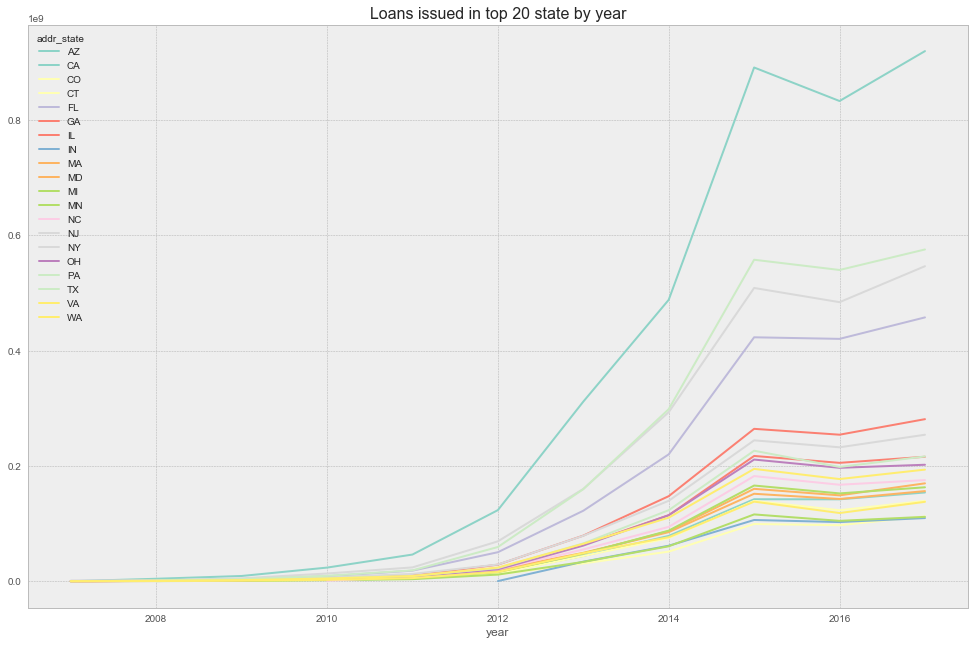

In [212]:
plt.style.use('bmh')
cmap = plt.cm.Set3

states_5.unstack().plot(stacked=False, colormap=cmap, grid=True, legend=True, figsize=(15,10))
plt.title('Loans issued in top 20 state by year', fontsize=16)

Text(0.5,1,'Loan Amounts Distribution')

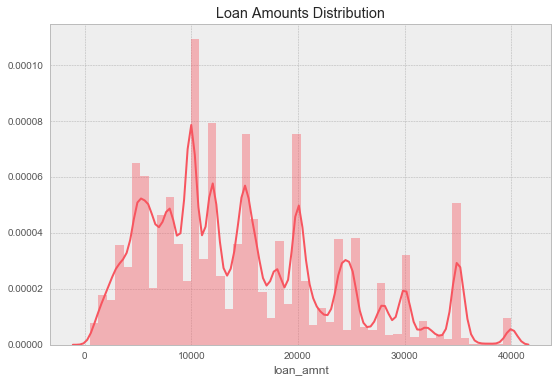

In [214]:
#loan Distribution
loan_amount = loan.loan_amnt
ax = plt.axes()
sns.distplot(loan_amount, color="#F7555F")
ax.set_title('Loan Amounts Distribution')

Text(0.5,1,'Loan to income ratio distribution')

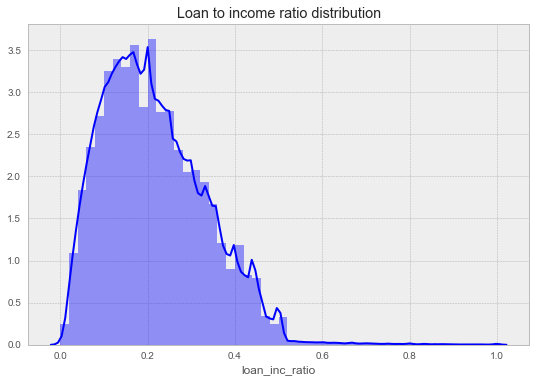

In [211]:
df_test = loan[loan['loan_inc_ratio'] <= 1.0]
loan_to_inc = df_test.loan_inc_ratio
ax = plt.axes()
sns.distplot(loan_to_inc, color="blue")
ax.set_title('Loan to income ratio distribution')

In [210]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot


for col in mp.columns:
    mp[col] = mp[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
       [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(74,39,143)']]

mp['text'] ="Avg Sal: $" + mp['state_avg_sal'] + '<br>' +"Avg loan: $" + mp['loan_amnt'] + '<br>' +"Avg Rate: $" + mp['int_rate']


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations =mp['addr_state'],
        z =mp['loan_score'].astype(float),
        locationmode = 'USA-states',
        text =mp['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Average Credit Score"
        )
    ) ]

layout = dict(
        title = 'Average Credit Score by State<br>(Hover for other info)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict( data=data, layout=layout )

file = iplot( fig, filename='d3-cloropleth-map' )

Text(0.5,1,'Average loan score for profession with most number of loans')

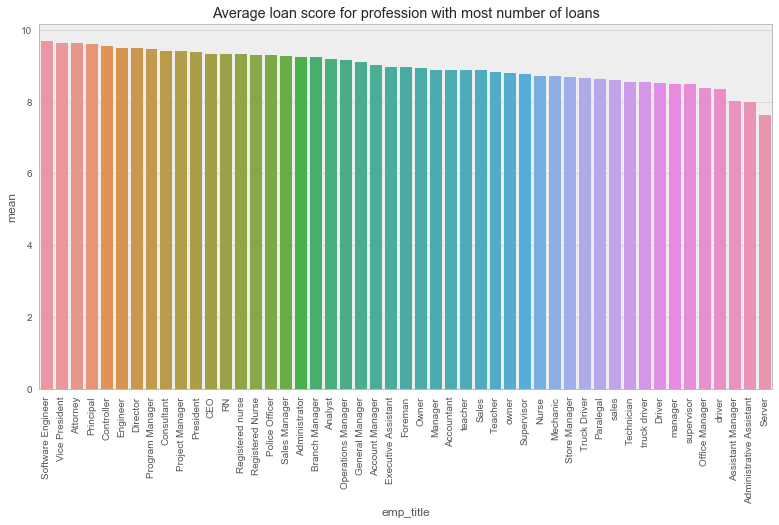

In [215]:
ax_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=ax_dims)
ax = sns.barplot(x="emp_title", y="mean", data=prof)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Average loan score for profession with most number of loans')


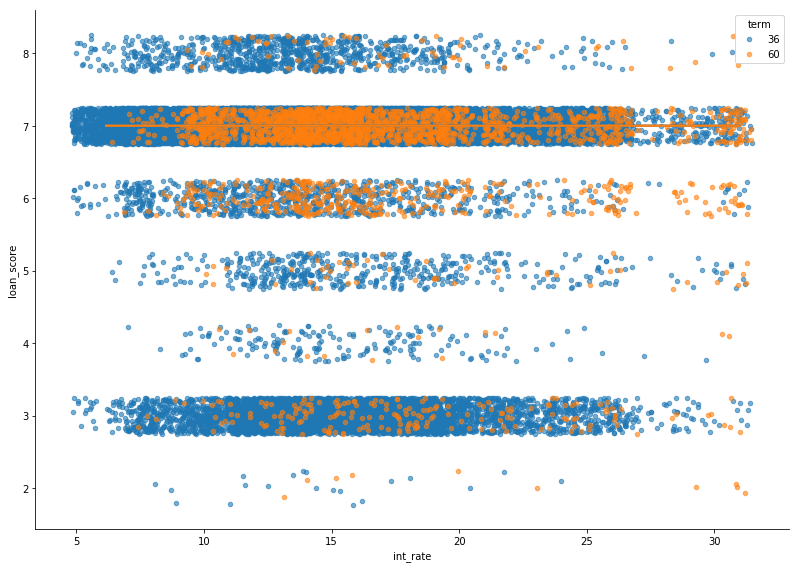

In [127]:
fig_pov = sns.lmplot("int_rate", "loan_score", x_jitter= .5,  y_jitter= .25,
           data=pov, hue='term',lowess=True, size=8,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

In [32]:
print("Accuracy Score for training:")
print(accuracy_score(y_train, classifier.predict(X_train)))
print("Accuracy Score for test:")
print(accuracy_score(y_test, classifier.predict(X_test)))
print("Delta:")
print(accuracy_score(y_train, classifier.predict(X_train))-accuracy_score(y_test, classifier.predict(X_test)))


Accuracy Score for training:
0.9972245661770193
Accuracy Score for test:
0.7232087952774606
Delta:
0.27401577089955864


Classification Report
             precision    recall  f1-score   support

          2       0.00      0.00      0.00        25
          3       0.21      0.01      0.03      8258
          4       0.20      0.03      0.05     56905
          5       0.06      0.00      0.00     13133
          6       0.23      0.02      0.04     92688
          7       0.70      0.55      0.62     52495
          8       0.65      0.83      0.73    355593
          9       0.23      0.04      0.07     92098
         10       0.78      0.94      0.85    722462

avg / total       0.64      0.72      0.66   1393657

Confusion Matrix:
[[     0      0      0      0     10     11      1      0      3]
 [     0    120    105      1      0   5028   2992      1     11]
 [     0     26   1671     45    301    970  47732    685   5475]
 [     0     10    237     22    308    462   5523    490   6081]
 [     0      8    314     28   2175    659   9239    827  79438]
 [     0    318    373      7     53  29119 

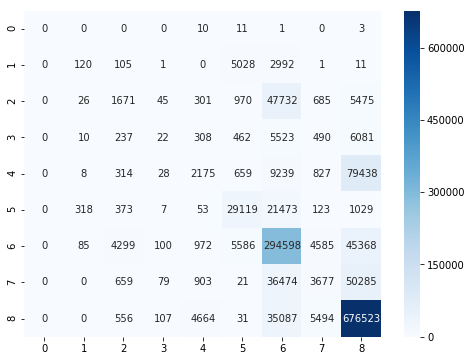

In [33]:
y_pred = classifier.predict(X_test)

#Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

#Confusion Matrix and Heatmap
print ("Confusion Matrix:")
log_matrix = metrics.confusion_matrix(y_test, y_pred)
print(log_matrix)


fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(log_matrix,annot=True,cmap = 'Blues',ax = ax,fmt = 'g')

In [1]:
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
%matplotlib inline

In [2]:
frames = []

In [3]:
import glob
files2016 = glob.glob('loanstats/LoanStats_2016*.csv')
for file in files2016:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [4]:
files2017 = glob.glob('loanstats/LoanStats_2017*.csv')
for file in files2017:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [5]:
data = pd.read_csv('loanstats/LoanStats4.csv',skiprows=1,low_memory=False)
frames.append(data)

In [6]:
filesremain = glob.glob('loanstats/LoanStats3*.csv')
for file in filesremain:
    data = pd.read_csv(file,skiprows=1,low_memory=False)
    frames.append(data)

In [ ]:
loan=pd.concat(frames)
print(loan.shape)
loan.head()

In [ ]:
loan = loan.iloc[:,2:36]
col = loan.columns
original = loan
col

In [ ]:
#loan=original
drop_cols=[]
check_val = 0.9*loan.shape[0]
for c in col:
    if loan[c].isnull().sum() > check_val:
        drop_cols.append(c)
loan.drop(drop_cols,axis=1,inplace=True)
loan.info(verbose=True)

In [ ]:
loan.isnull().sum()

In [10]:
#deal with the null values
loan.drop(['zip_code','mths_since_last_delinq','revol_util','dti','mths_since_last_record',
          'funded_amnt', 'funded_amnt_inv'],axis=1,inplace=True)
loan.emp_length.fillna(0,inplace=True)
loan.emp_title.fillna('NA',inplace=True)
loan.emp_title.isnull().sum()
loan.dropna(inplace=True)

In [ ]:
print(loan.shape)
loan.head(1)

In [12]:
#avg salary for each state
import warnings
warnings.filterwarnings('ignore')
import ab_state as cs
page = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_income'
infoboxes = pd.read_html(page)
state_sal = infoboxes[2]
state_sal.rename(columns=state_sal.iloc[0],inplace=True)
state_sal=state_sal.iloc[1:,1:] 
cs.states
state_sal.replace({"State": cs.states},inplace=True)
state_sal['2015']=state_sal['2015'].str.replace('$','')
state_sal['2014']=state_sal['2012'].str.replace('$','')
state_sal['2013']=state_sal['2013'].str.replace('$','')
state_sal['2012']=state_sal['2012'].str.replace('$','')
state_sal['2011']=state_sal['2011'].str.replace('$','')
state_sal['2015']=state_sal['2015'].str.replace(',','').astype(float)
state_sal['2014']=state_sal['2012'].str.replace(',','').astype(float)
state_sal['2013']=state_sal['2013'].str.replace(',','').astype(float)
state_sal['2012']=state_sal['2012'].str.replace(',','').astype(float)
state_sal['2011']=state_sal['2011'].str.replace(',','').astype(float)
state_sal['avg_sal'] = state_sal.iloc[:,2:].mean(axis=1)
avg_sal_dict = state_sal.set_index('State').to_dict()['avg_sal']
loan['state_avg_sal']=loan['addr_state'].map(avg_sal_dict)
loan['sal_flag'] =0

In [14]:
#Creating a basic arbitary score based on income first
def sal(loan):
    if loan.annual_inc > 1.1 * loan.state_avg_sal:
        return 10
    elif loan.annual_inc > loan.state_avg_sal:
        return 9
    elif loan.annual_inc > 0.5*loan.state_avg_sal:
        return 8
    elif loan.annual_inc > 0.1*loan.state_avg_sal:
        return 7
    else:
        return 6

loan.loc[:,'sal_flag'] =loan.apply(sal,axis=1)

In [ ]:
loan.sal_flag.value_counts()

In [16]:
#score deduction based on current status
status_deduct_dict = {
"Fully Paid": 0,
"Current": 0,                                               
"Charged Off": -4,                                           
"Late (31-120 days)":-2,                                    
"In Grace Period": -1,                                       
"Late (16-30 days)": -1,                                     
"Does not meet the credit policy. Status:Fully Paid":0,    
"Does not meet the credit policy. Status:Charged Off":-4,
"Default":-3
}
loan['status_deduct'] = loan['loan_status'].map(status_deduct_dict)

In [17]:
loan['loan_score'] = (loan.sal_flag + loan.status_deduct) 


In [ ]:
tmp1 = loan[loan['loan_score'] < 99]
dist_score = tmp1.loan_score
ax = plt.axes()
sns.distplot(dist_score, color="magenta")
ax.set_title('Loan Score distribution')

In [19]:
# #Extract Relevant information from the columns
# #Term, int_rate, emp_length
loan['term']=loan.term.str.split().str[0].astype(int)
loan['int_rate']=loan.int_rate.str.replace('%','').astype(float)
loan['emp_length']=loan.emp_length.str.extract('(\d+)').astype(float)
loan.emp_length.fillna(0,inplace=True)

# #changing the verification status, payment plan and home ownership to nominal values
func1 = lambda x: 1 if x=='Source Verified' else 0
loan['verification_status']=loan.verification_status.apply(func1)

func2 = lambda x: 1 if (x=='MORTGAGE' or x=='OWN') else 0
loan['home_ownership']=loan.home_ownership.apply(func2)

func3 = lambda x: 1 if (x=='y') else 0
loan['pymnt_plan'] = loan.pymnt_plan.apply(func3)

#change grade and sub grade to numeric value
grade_dict ={
    'A':1,'B':2,'C':3,'D':4,'E':5, 'F': 6 ,'G':7
}
loan.replace({"grade": grade_dict},inplace=True)
loan['sub_grade']=loan.sub_grade.str.extract('(\d+)').astype(float)




In [20]:
#Extract Year from the date
i_date = pd.to_datetime(loan['issue_d'])
loan['year'] = i_date.dt.year

#change the dates (date since credit line) for the to numerical value in terms of years
from datetime import datetime
loan.issue_d = pd.to_datetime(loan.issue_d)
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line)
loan['cr_line']= pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
loan['cr_line'] = ((loan['earliest_cr_line']-loan['cr_line']).dt.days).astype(int)
loan['cr_line'] = loan['cr_line']/(-365)


In [21]:
# Other new columns for the model
loan['loan_inc_ratio'] = loan['loan_amnt']/loan['annual_inc'].replace(0, np.inf)
#loan[loan['loan_inc_ratio']>10.0][['annual_inc','loan_amnt','loan_inc_ratio','loan_status']]

#space for other columns if needed

In [ ]:
#get the numeric values in a datset and convert it to float 
# df=loan[['loan_amnt','term', 'int_rate','installment','annual_inc',
#         'emp_length','grade','sub_grade','home_ownership',
#         'verification_status','pymnt_plan','delinq_2yrs','inq_last_6mths',
#         'open_acc','pub_rec','total_acc',
#         'cr_line','loan_inc_ratio',
#         'loan_score']]

df=loan[['term', 'int_rate','installment',
        'emp_length','grade','sub_grade','home_ownership',
        'verification_status','delinq_2yrs','inq_last_6mths',
        'open_acc','pub_rec','total_acc',
        'cr_line','loan_inc_ratio']]
cor  =  df.corr()
cor

In [23]:
#drop correlated columns
df.drop(['grade','open_acc'],axis=1,inplace=True)

In [ ]:
df_test2 = loan[loan['loan_inc_ratio'] > 50.0]
loan_to_inc2 = df_test2.loan_inc_ratio
sns.distplot(loan_to_inc2, color="green")

In [ ]:
import skflow
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


In [ ]:
t_size = 0.8
x_vals = df.values
x_vals = x_vals.astype(float)
response = loan['loan_score'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(x_vals, response, test_size=t_size, random_state=25)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
classifier = RandomForestClassifier(n_estimators = 20)
estimate = classifier.fit(X_train, y_train)
estimate

In [ ]:
mp = loan[['addr_state','loan_score','state_avg_sal','loan_amnt','int_rate']]
#mp.set_index('addr_state',inplace=True)
mp = mp.groupby('addr_state').mean()
mp.reset_index(level=0, inplace=True)
mp.head()

In [ ]:
#Analysis by profession
#Most Common Profession

prof = loan.groupby('emp_title')['loan_score'].agg(['mean','count'])
prof = prof.sort_values(by='count', ascending=False)
prof = prof.iloc[1:50,:].sort_values(by='mean', ascending=False)
prof.reset_index(level=0, inplace=True)
prof

In [105]:
#Below Poverty line analysis
pov = loan[loan['annual_inc'] < 23000]
pov =pov[['int_rate','term','loan_score']]

In [ ]:
loans_state = loan[['addr_state','loan_amnt']]
loans_state = loans_state.groupby('addr_state').sum()
loans_state = loans_state.sort_values(by='loan_amnt', ascending=False)
loans_state.reset_index(level=0, inplace=True)
loans_state = loans_state.iloc[:20,:]
state_list = loans_state.addr_state.values.tolist()
state_list

In [200]:
states_5 = loan[loan.addr_state.isin(state_list)]

In [201]:
states_5 = states_5[['addr_state','year','loan_amnt']]
#states_5.year.astype(str,inplace=True)
states_5 = states_5.groupby(['year','addr_state'])['loan_amnt'].sum()